In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('/Users/atulyasharma/Documents/M.S in Information Systems/University Curriculum/Spring 2020/INFO 6105 Data Science Engineering Methods and Tools/Projects/April 12, 2020/final_data_6105.csv')
df.head()

,Unnamed: 0,acct_age,favourites_count,followers_count,following,friends_count,id,in_reply_to_user_id,lang,name,num_hashtags,num_mentions,num_urls,retweet_count,statuses_count,user_type,verified
0,3,0.690280,0.325147,0.002278,NaN,0.039731,191839658,0.145937,en,pocahontas farida,0.023177,0.305854,0.097820,0.104106,0.608592,1,0.0
1,5,0.426396,0.008454,0.000650,NaN,0.043174,2157382005,0.220953,en,JO,0.036912,0.462550,0.115661,0.002666,0.038725,1,0.0
2,6,0.431029,0.102509,0.001056,NaN,0.081001,1947320929,0.040046,en,❄McKayla❄,0.060868,0.383332,0.087200,0.527673,0.041007,1,0.0
3,8,0.438640,0.007586,0.000341,NaN,0.010368,1733095801,0.036730,en,Nicole Romany,0.103199,0.198605,0.176801,0.000979,0.014555,1,0.0
4,12,0.822222,0.000016,0.001974,NaN,0.084889,21959183,0.044361,en,Randee Deason,0.082895,0.218627,0.207693,0.002465,0.031046,1,0.0


In [3]:
del df['Unnamed: 0']
del df['name']
del df['lang']

In [4]:
df.shape

(2099, 14)

In [5]:
df.isnull().sum()

acct_age                  0
favourites_count          0
followers_count           0
following              1083
friends_count             0
id                        0
in_reply_to_user_id       0
num_hashtags              0
num_mentions              0
num_urls                  0
retweet_count             0
statuses_count            0
user_type                 0
verified                  0
dtype: int64

In [6]:
df = df.fillna(0)

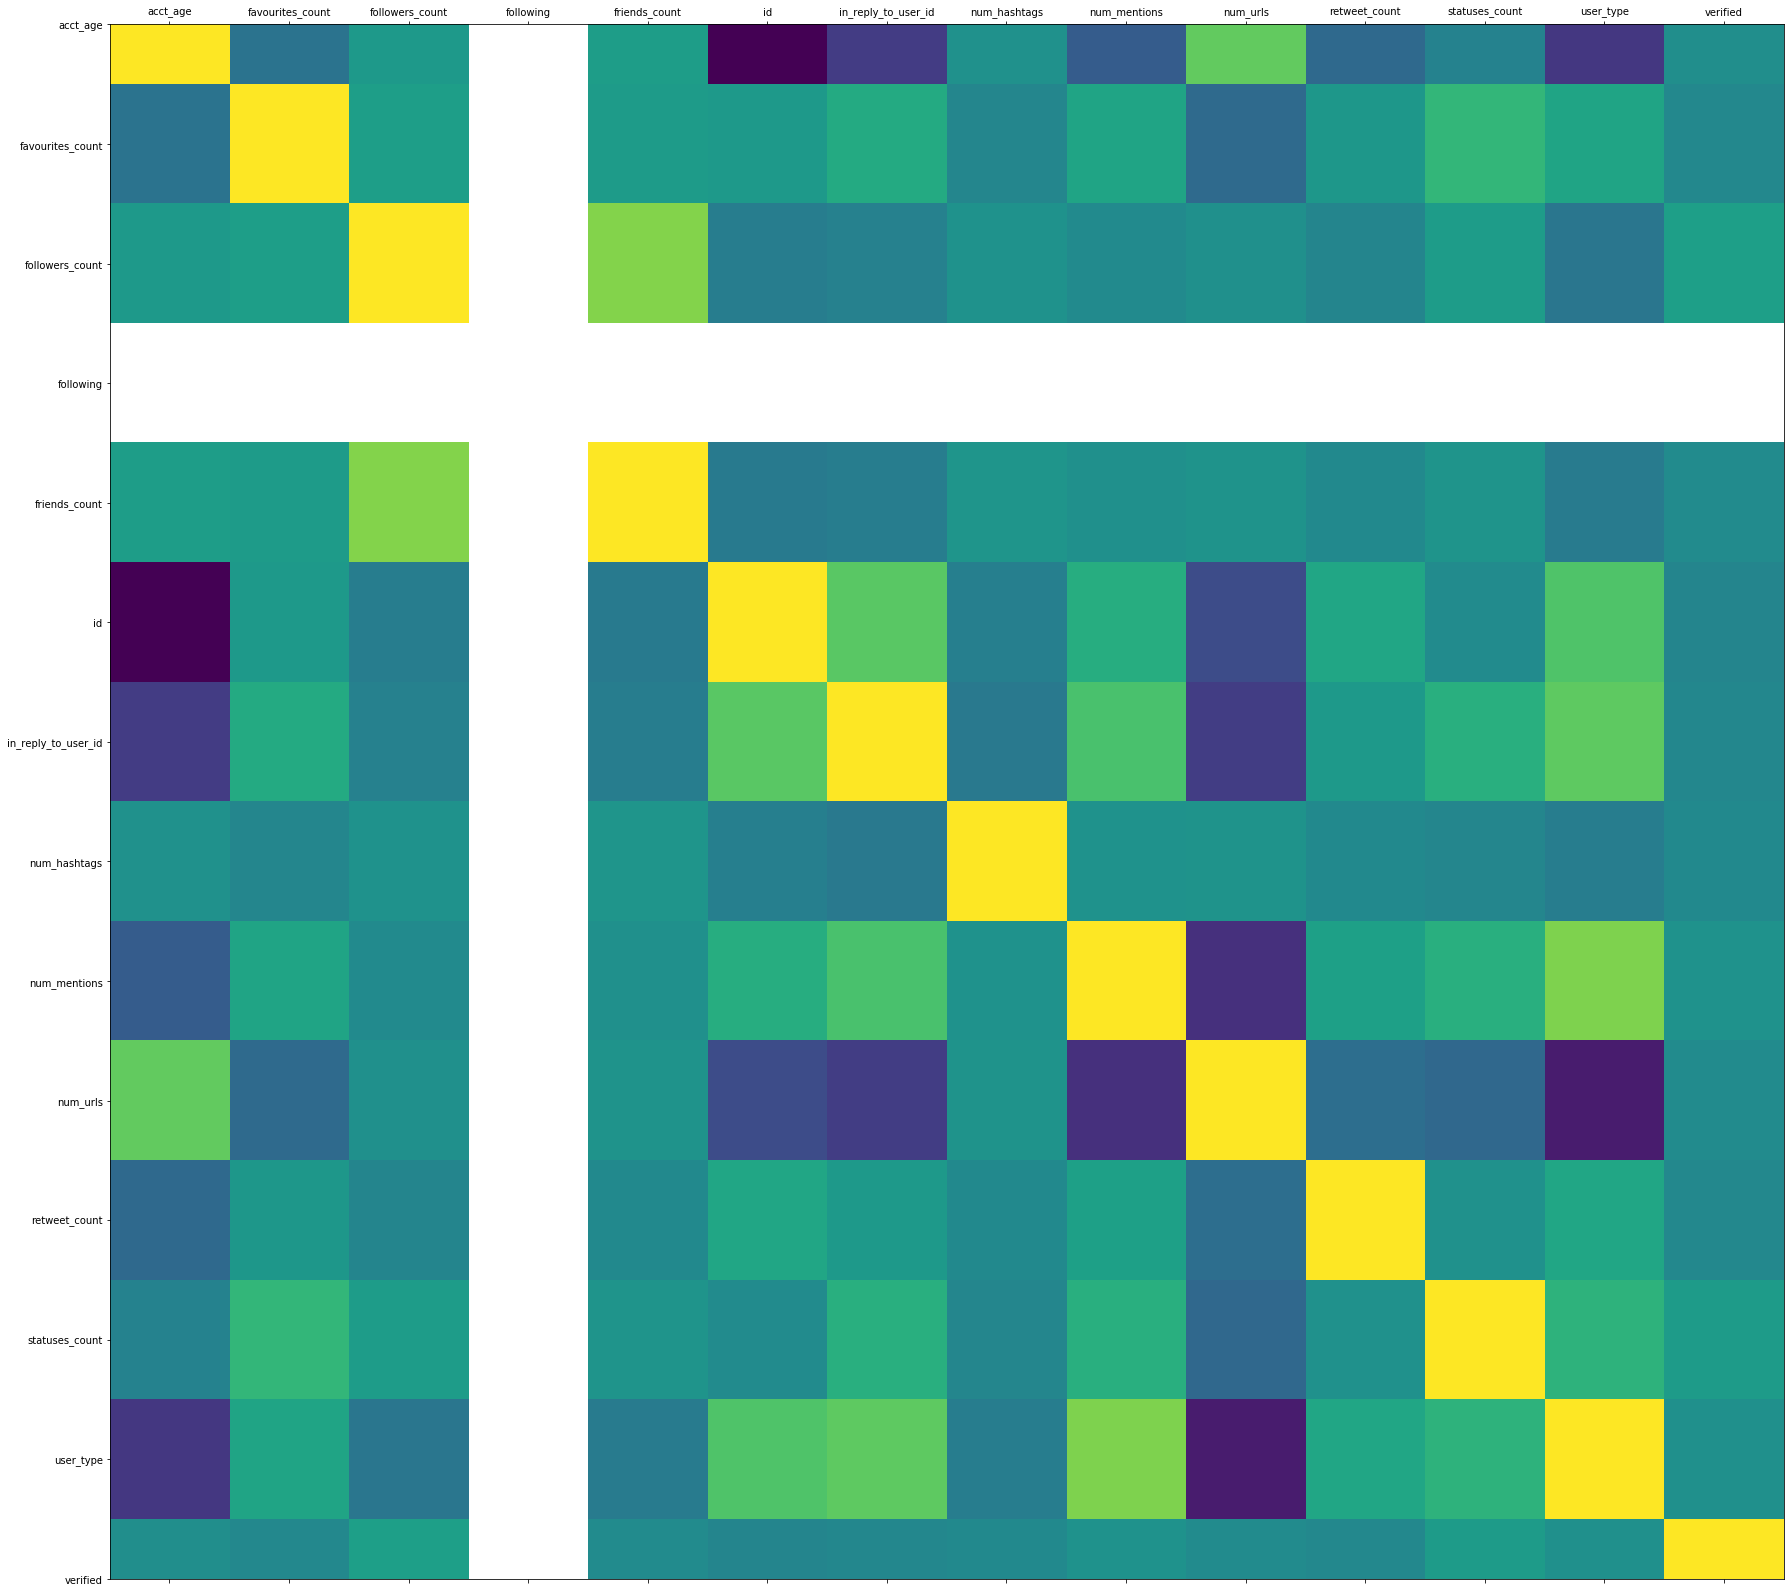

In [7]:
# Plotting correlation between all the input columns

def plot_corr(df, size=30):
    
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(df)

In [8]:
y = df.user_type.values.reshape(2099,1);

In [9]:
print(y)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [10]:
X = df.loc[:, df.columns != 'user_type']

In [11]:
# Scaling of data to separate datapoints

from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X_scale = scaling.transform(X)

In [14]:
# Splitting test and train data before implementing Logistic Regresssion

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=0)

# Implementing Logistic Regression

log_reg = LogisticRegression(solver='lbfgs')

# Fit the data into the model

log_reg.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Accuracy of predicting the train data

logreg_train = log_reg.predict(X_train)
logreg_train_accuracy = sum(logreg_train==y_train.ravel())/len(y_train.ravel())
print('Accuracy of Training Data',logreg_train_accuracy)

# Accuracy of predicting the test data

print('Accuracy of Testing Data',log_reg.score(X_test, y_test))

Accuracy of Training Data 0.9189925119128659
Accuracy of Testing Data 0.9126984126984127


In [91]:
# Cross Validation

from sklearn.model_selection import cross_val_score

X = df.loc[:, df.columns != 'user_type']
y = np.array(df['user_type'])
cross_val_score(log_reg, X_scale, y, cv = 5)

array([0.93586698, 0.92857143, 0.9452381 , 0.83054893, 0.92362768])

In [92]:
# Predict using the model

predict_train = log_reg.predict(X_train)
predict_test = log_reg.predict(X_test)


In [93]:
# Confusion Matrix to identify True Positives, True Negatives, False Positives and False Negatives

cm_train = confusion_matrix(y_train.ravel(), predict_train)
cm_test = confusion_matrix(y_test.ravel(), predict_test)
print('Training Accuracy: \n', cm_train)
print('')
print('Testing Accuracy: \n', cm_test)



Training Accuracy: 
 [[659  57]
 [ 62 691]]

Testing Accuracy: 
 [[281  19]
 [ 36 294]]


In [94]:
import seaborn as sns

Text(0.5, 1, 'Training Accuracy')

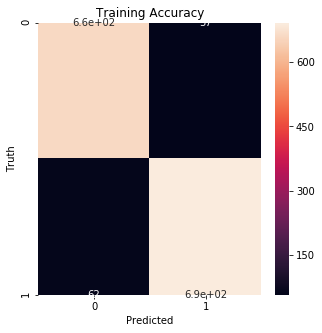

In [95]:
plt.figure(figsize = (5,5))
sns.heatmap(cm_train, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Training Accuracy')

Text(0.5, 1, 'Testing Accuracy')

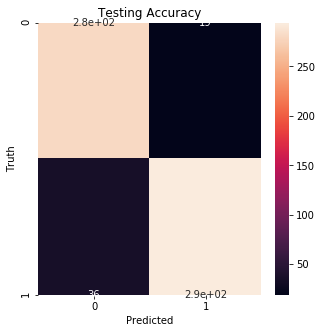

In [96]:
plt.figure(figsize = (5,5))
sns.heatmap(cm_test, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Testing Accuracy')

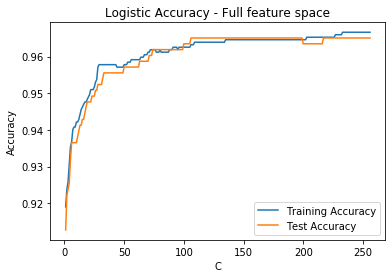

In [97]:
from sklearn import metrics

trainAcc = []
testAcc = []
C = []
for i in range (1, 257):
    clf = LogisticRegression(solver='lbfgs', C=i, max_iter=1000)
    clf.fit(X_train, y_train.ravel()) 
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    trainAcc.append(metrics.accuracy_score(y_train.ravel(), y_pred_train.ravel()))
    testAcc.append(metrics.accuracy_score(y_test.ravel(), y_pred_test.ravel()))
    C.append(i)

    
plt.plot(C, trainAcc, label = "Training Accuracy")
plt.plot(C, testAcc, label = "Test Accuracy")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Logistic Accuracy - Full feature space')
plt.legend()
plt.show()

# Implementing PCA and retraining data for predictions

In [22]:
# Implementing PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X_scale)
X_pca = pca.transform(X_scale)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (2099, 13)
transformed shape: (2099, 3)


In [23]:
# Splitting test and train data after after implementing PCA before implementing Logistic Regresssion

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

# Perform Logistic Regression

log_reg = LogisticRegression(solver='lbfgs')

# Fit the data and retrain after implementing PCA

log_reg.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:

logreg_train = log_reg.predict(X_train)
logreg_train_accuracy = sum(logreg_train==y_train.ravel())/len(y_train.ravel())
print('Accuracy of Training Data after PCA', logreg_train_accuracy)

print('Accuracy of Testing Data after PCA', log_reg.score(X_test, y_test))

Accuracy of Training Data after PCA 0.8917631041524847
Accuracy of Testing Data after PCA 0.8857142857142857


In [25]:
# Cross Validation 

from sklearn.model_selection import cross_val_score

X = df.loc[:, df.columns != 'user_type']
y = np.array(df['user_type'])
cross_val_score(log_reg, X_pca, y, cv = 5)

array([0.91686461, 0.91666667, 0.92380952, 0.81861575, 0.90214797])

In [26]:
# Predict using the model

predict_train = log_reg.predict(X_train)
predict_test = log_reg.predict(X_test)


In [27]:
# Confusion Matrix to identify True Positives, True Negatives, False Positives and False Negatives

cm_train_pca = confusion_matrix(y_train.ravel(), predict_train)
cm_test_pca = confusion_matrix(y_test.ravel(), predict_test)
print('Training Accuracy: \n', cm_train_pca)
print('')
print('Testing Accuracy: \n', cm_test_pca)



Training Accuracy: 
 [[634  82]
 [ 77 676]]

Testing Accuracy: 
 [[273  27]
 [ 45 285]]


Text(0.5, 1, 'Training Accuracy after PCA')

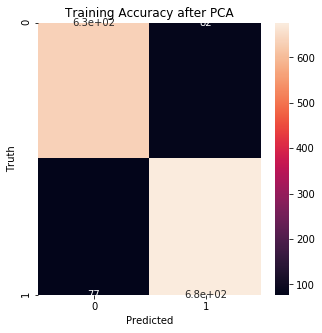

In [28]:
import seaborn as sns

plt.figure(figsize = (5,5))
sns.heatmap(cm_train_pca, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Training Accuracy after PCA')

Text(0.5, 1, 'Testing Accuracy after PCA')

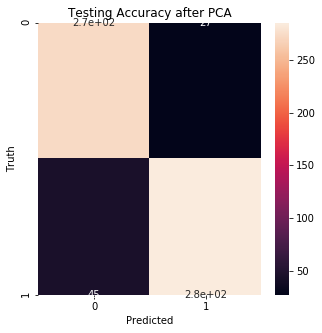

In [29]:
plt.figure(figsize = (5,5))
sns.heatmap(cm_test_pca, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Testing Accuracy after PCA')

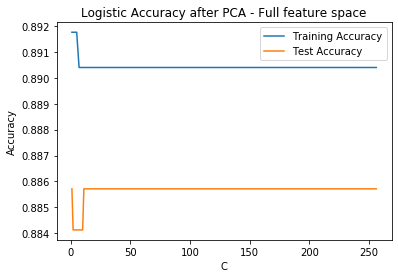

In [30]:
from sklearn import metrics

trainAcc = []
testAcc = []
C = []
for i in range (1, 257):
    clf = LogisticRegression(solver='lbfgs', C=i, max_iter=1000)
    clf.fit(X_train, y_train.ravel()) 
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    trainAcc.append(metrics.accuracy_score(y_train.ravel(), y_pred_train.ravel()))
    testAcc.append(metrics.accuracy_score(y_test.ravel(), y_pred_test.ravel()))
    C.append(i)

    
plt.plot(C, trainAcc, label = "Training Accuracy")
plt.plot(C, testAcc, label = "Test Accuracy")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Logistic Accuracy after PCA - Full feature space')
plt.legend()
plt.show()